To start this project, I will gather at the beginning all the libraries used to manipulate data, create visualizations, and develop and deploy machine learning models (ML).

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from scipy.stats.mstats import normaltest

# Data Preparation

## Data understanding - EDA:

#### Data characterisation:

The method 'pd.read_csv' was used to access the CSV files ('anime.csv' and 'rating.csv'). Then, I used the method '.head()' to visualize the data, followed by the method '.shape' to determine the dataset size, and the '.info()' to see the data types and null-values.

The 'anime' dataset has 12,294 records and 7 features. While the second dataset 'rating' has 7,813,737 records and 3 features. The 'rating' dataset will be referred to as 'user' to facilitate understanding that these records are from the users.

In [7]:
anime = pd.read_csv('anime.csv')
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [8]:
anime.shape

(12294, 7)

In [9]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [10]:
user = pd.read_csv('rating.csv')
user.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [11]:
user.shape

(7813737, 3)

In [12]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


#### Checking for missing values and duplicates:
I will use the '.isnull()' and '.sum()' functions to verify the presence of missing values in both datasets. Additionally, I will check for duplicates using the '.duplicated().sum()' function. These procedures are essential for ensuring data quality when performing statistical analysis, visualization, and modeling. Without them, the results can be unreliable and inaccurate, potentially leading to incorrect decisions.

As seen in the results, the 'user' dataset does not contain any missing values. However, the 'anime' dataset exhibits 2.25% missing values. Considering this proportion is not substantial, I have decided to remove them.

In [14]:
anime.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [15]:
user.isnull().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

 will use the Missingno library to visually represent the missing values.

<Axes: >

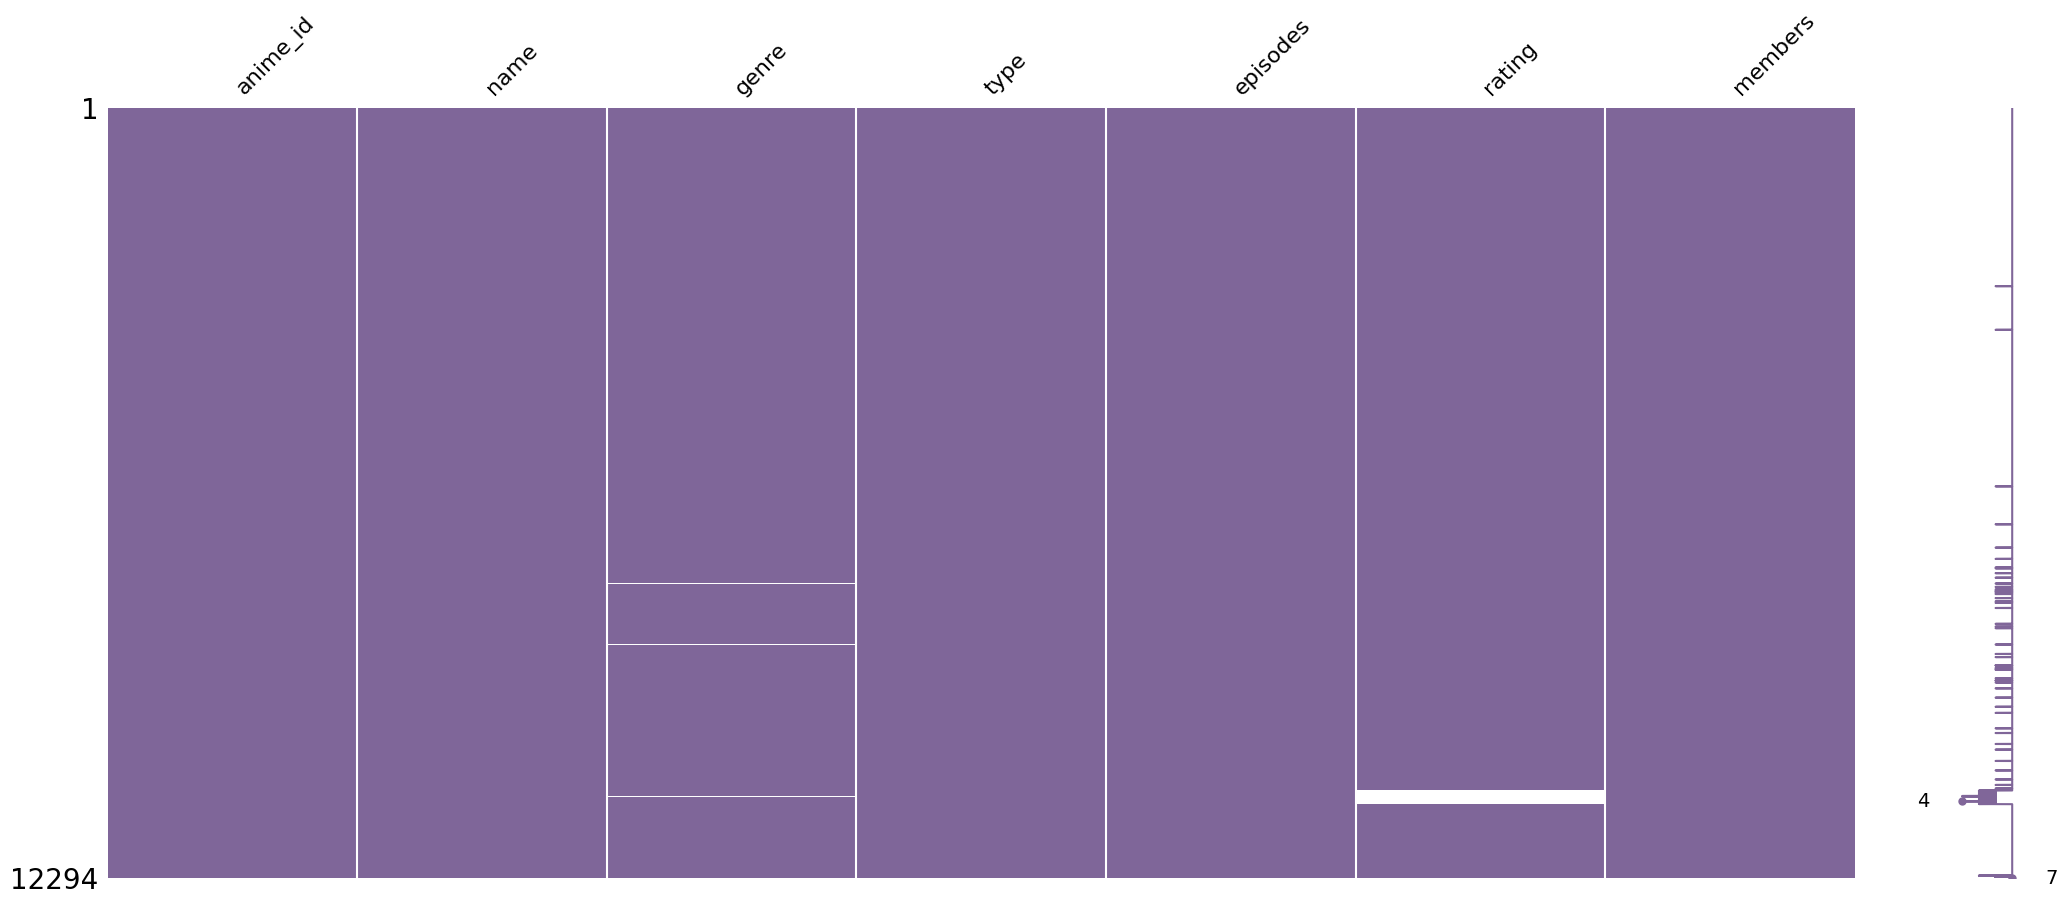

In [17]:
msno.matrix(anime, color=(0.5, 0.4, 0.6))

Removing missing values with the 'dropna()' function.

In [19]:
anime.dropna(axis=0, inplace=True)

In [20]:
anime.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [21]:
anime.shape

(12017, 7)

#### Checking for duplicates:

As we can see below there were no duplicates in the 'anime' dataset, but there is 1 duplicate in the 'user' dataset that was removed using the '.drop_duplicates()' function.

In [23]:
anime.duplicated().sum()

0

In [24]:
user.duplicated().sum()

1

In [25]:
user.drop_duplicates(inplace=True)

In [26]:
user.duplicated().sum()

0

#### Checking for data distribution:
The function 'normal_test()' will be used to verify if the numerical variables from the 'anime' and 'user' datasets follow a normal distribution. 

The 'anime_id' from the 'anime' dataset, and the 'user_id' and 'anime_id' from theuser'g' data were not considered as they consist of unique values that do not provide meaningful information.

In [28]:
result_anime_r = normaltest(anime['rating'].values)
result_anime_m = normaltest(anime['members'].values)

print("Normality test results for anime-rating:", result_anime_r[1])
print("Normality test results for anime-members:", result_anime_m[1])

Normality test results for anime-rating: 3.4711753253907713e-133
Normality test results for anime-members: 0.0


Considering the results from the 'anime' dataset, we observe that for both variables, their p-values are less than 0.05 (significance level). This indicates strong evidence against the null hypothesis, suggesting that these variables do not follow a normal distribution.

The 'rating' variable from 'user' dataset contains -1 and negative values are not allowed in the 'normaltest()' function. Because of this I removed them to verify the distribution of this variable.

In [31]:
user_no_neg = user['rating'].value_counts()
user_no_neg = user_no_neg[user_no_neg.index != -1]

In [32]:
result_user_r = normaltest(user_no_neg)
print("Normality test results for user-rating (excluding -1 values):", result_user_r.pvalue)

Normality test results for user-rating (excluding -1 values): 0.2671013112231672


C:\Users\danie\anaconda3\Lib\site-packages\scipy\stats\_mstats_basic.py:3069: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  k, _ = kurtosistest(a, axis)


The p-value for the 'rating' variable in the 'user' dataset is greater than 0.05, indicating that there is not sufficient evidence to reject the null hypothesis. Therefore, we can consider that this variable is approximately normally distributed.

Below I will plot the histograms to see the distrubutions for 'rating' and 'members' from 'anime' dataset, and 'rating' from 'user' dataset. 

I chose this type of visualization because the distribution of data can be easily understood, with the frequency or count of observations displayed in each interval (bins) (seaborn.pydata.org, n.d.)

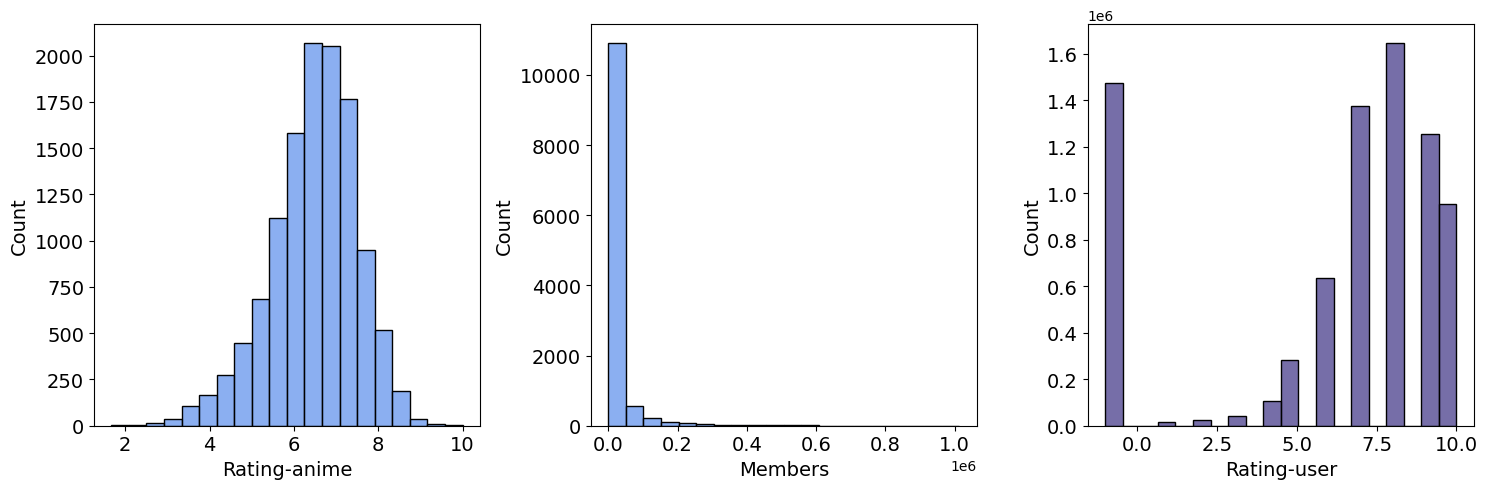

In [35]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(data=anime, x="rating", bins=20, color='#6495ed', ax=axs[0])
axs[0].set_xlabel("Rating-anime", fontsize=14)
axs[0].set_ylabel("Count", fontsize=14)
axs[0].tick_params(axis='x', labelsize=14)
axs[0].tick_params(axis='y', labelsize=14)

sns.histplot(data=anime, x="members", bins=20, color='#6495ed', ax=axs[1])
axs[1].set_xlabel("Members", fontsize=14)
axs[1].set_ylabel("Count", fontsize=14)
axs[1].tick_params(axis='x', labelsize=14)
axs[1].tick_params(axis='y', labelsize=14)

sns.histplot(data=user, x="rating", bins=20, color='#483d8b', ax=axs[2])
axs[2].set_xlabel("Rating-user", fontsize=14)
axs[2].set_ylabel("Count", fontsize=14)
axs[2].tick_params(axis='x', labelsize=14)
axs[2].tick_params(axis='y', labelsize=14)

plt.tight_layout()
plt.show()

#### Checking for outliers:

I will check for outliers and verify if I can remove them without losing the data integrity.
As we can see below, the removal of outliers will be impossible since the entire dataset has been considered outliers. Even when I reduced the threshold to 0.00005, the number of outliers continued to be high. In addition, it seems that the outliers are simply part of the natural variation in the datasets, as evident from the boxplot (below). Therefore, I have decided not to remove outliers.s.

I will not used the 'members' variable from 'anime' because it only provides records about the number of members per anime.

In [38]:
Q1_a = anime[['rating']].quantile(0.25)
Q3_a = anime[['rating']].quantile(0.75)
IQR_a = Q3_a - Q1_a

In [39]:
left, right = anime.align((Q1_a-1.5*IQR_a), axis=1, copy=False)
left, right = left.align((Q3_a+1.5*IQR_a), axis=1, copy=False)
outliers_a = anime[~((left < right).any(axis=1))]

In [40]:
outliers_a.shape

(12, 7)

In [41]:
Q1_r = user[['rating']].quantile(0.25)
Q3_r = user[['rating']].quantile(0.75)
IQR_r = Q3_r - Q1_r

In [42]:
left, right = user.align((Q1_r-1.5*IQR_r), axis=1, copy=False)
left, right = left.align((Q3_r+1.5*IQR_r), axis=1, copy=False)
outliers_r = user[~((left < right).any(axis=1))]

In [43]:
outliers_r.shape

(0, 3)

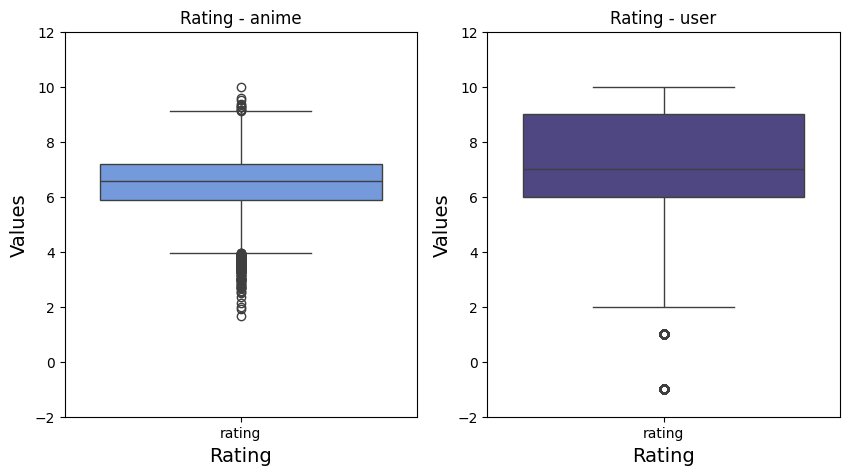

In [44]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

sns.boxplot(data=anime[['rating']], color='#6495ed', ax=axs[0])
axs[0].set_ylim(bottom=-2, top=12)  
axs[0].set_title('Rating - anime')
axs[0].set_xlabel('Rating', fontsize=14)
axs[0].set_ylabel('Values', fontsize=14)

sns.boxplot(data=user[['rating']], color='#483d8b', ax=axs[1])
axs[1].set_ylim(bottom=-2, top=12) 
axs[1].set_title('Rating - user')
axs[1].set_xlabel('Rating', fontsize=14)
axs[1].set_ylabel('Values', fontsize=14)

plt.show()

# Insights from dataset 'anime'

Three questions were proposed to gain insights from this dataset. These questions are:

- What are the top anime genres?- 
What are the type of anime media availabl?
- 
What are the top 10 anime with the highest rating?

#### What are the top anime genres?

In [47]:
from collections import Counter

# Assuming anime is your DataFrame with a column named 'genre'
genres = anime['genre'].str.split(', ').explode().str.strip()

# Count genre occurrences
genre_counts = Counter(genres)

# Sort genres by count
sorted_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)
genres_sorted, counts_sorted = zip(*sorted_genres)

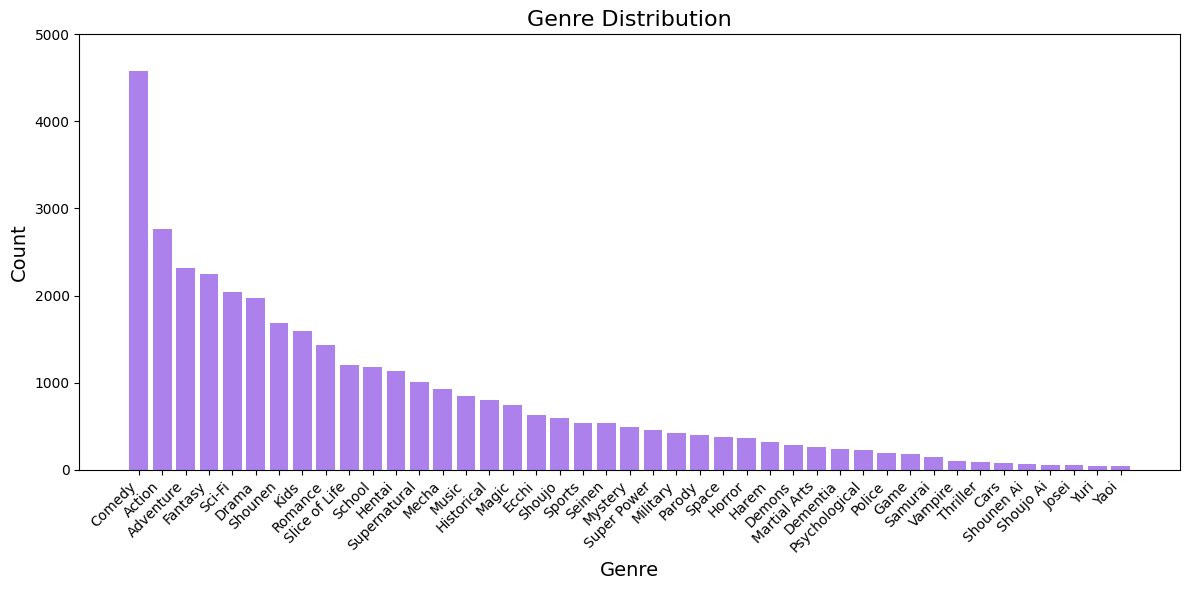

In [48]:
plt.figure(figsize=(12, 6))
plt.bar(genres_sorted, counts_sorted, color='#ac81ec')
plt.ylim(bottom=0, top=5000) 
plt.title('Genre Distribution', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### What are the type of anime media available?

In [50]:
# Group by the 'type' column and count the occurrences of each type
type_count = anime['type'].value_counts()

# Convert the series to a DataFrame and reset the index to make 'type' a column
type_count_df = type_count.reset_index()

# Rename the columns to 'type' and 'count'
type_count_df.columns = ['type', 'count']

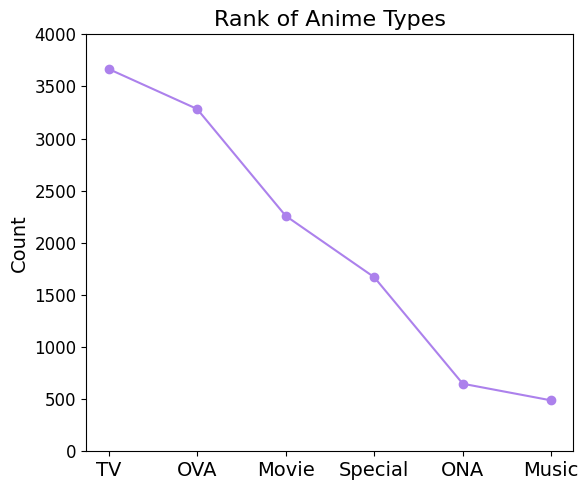

In [51]:
plt.figure(figsize=(6, 5))
plt.plot(type_count_df['type'], type_count_df['count'], marker='o', linestyle='-', color='#ac81ec')
plt.ylim(bottom=0, top=4000)
#plt.xlabel('Anime Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Rank of Anime Types', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

#### What are the top 10 anime with the highest ratings?

In [53]:
# Sort the DataFrame by 'rating' column in descending order and select top 10
top_10_anime = anime.sort_values(by='rating', ascending=False).head(10)

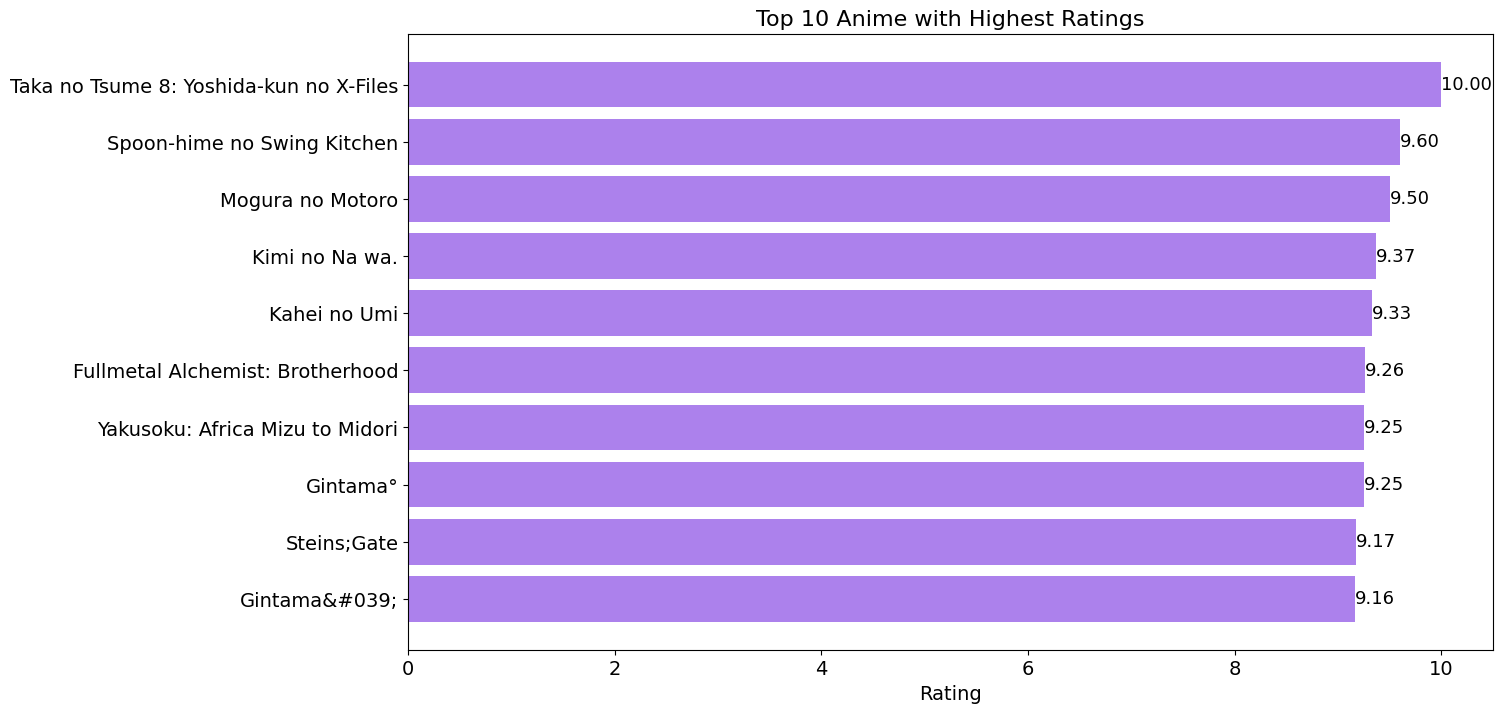

In [54]:
# Create a bar plot
plt.figure(figsize=(14, 8))
bars = plt.barh(top_10_anime['name'], top_10_anime['rating'], color='#ac81ec')

# Put the value of each bar on the plot
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}',
             va='center', ha='left', fontsize=13)
plt.xlabel('Rating', fontsize=14)
plt.title('Top 10 Anime with Highest Ratings', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.gca().invert_yaxis()
plt.show()

**Conclusion**

The analysis resulted in the top anime genres being 'Comedy', followed by 'Action' and 'Adventure', with the most available anime media being 'TV' and 'OVA' (Original Video Animations) — special episodes made separately from the rest of the season episodes in an anime series.

When considering the top 10 anime with the highest ratings, we can observe that all of them have similar ratings, but the anime called 'Taka no Tsume 8: Yoshida-kun no X-Files' was the only one to achieve a rating of 10.

Therefore, if I had to suggest some anime for a website to a new user who does not have any viewing history yet, I would suggest at least one representative of each genre ('Comedy', 'Action', and 'Adventure'), as well as from the 'TV' and 'OVA' media categories. Additionally, I would recommend all of the top 10 anime with the highest ratings.

I believe that this approach may guarantee that new users get a variety of options to explore, catering to different preferences and interests. This could be a great way to introduce someone to anime, especially if they're just starting out and don't have a viewing history yet.

# Machine learning models

## Content Filtering:

This technique creates a user profile based on data provided directly (explicit feedback) or indirectly (implicit feedback) by the user, such as a rating given to a product; then this information is used to recommend more similar products or services (Patel, Patel and Chauhan, 2023, p.852).

Below, I will display the first 5 records in the features 'name' and 'genre' to have a quick overview of these entries.

In [59]:
anime[['name','genre']].head(5)

,name,genre
0,Kimi no Na wa.,"Drama, Romance, School, Supernatural"
1,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili..."
2,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S..."
3,Steins;Gate,"Sci-Fi, Thriller"
4,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S..."


As we observed earlier, the genres are separated by commas. In the code below, I will replace the commas with spaces to minimize interference with the TF-IDF, which I will apply here.

In [61]:
anime['genre'] = anime['genre'].str.replace(',',' ')

#### Term Frequency and Inverse Document Frequency (TF-IDF)

The purpose of using the Term Frequency-Inverse Document Frequency Method (TF-IDF) is to assign heavy weight to any term that appears frequently in a given document but not in many documents across the corpus (Müller and Guido, 2017, p.336).

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [64]:
anime['genre']=anime['genre'].str.replace('Sci-fi','Scifi')
anime['genre']=anime['genre'].str.replace('Slice of Life','SoL')

The lines of code, below are using TfidfVectorizer to convert the genre data of anime into a numerical matrix representation, where each row corresponds to an anime and each column corresponds to a particular word (genre), with the cell values representing the importance of that word within that anime's genre description based on its TF-IDF score.

In [66]:
tfidf_vector = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vector.fit_transform(anime['genre'])

In [67]:
print(list(enumerate(tfidf_vector.get_feature_names_out())))

[(0, 'action'), (1, 'adventure'), (2, 'ai'), (3, 'arts'), (4, 'cars'), (5, 'comedy'), (6, 'dementia'), (7, 'demons'), (8, 'drama'), (9, 'ecchi'), (10, 'fantasy'), (11, 'fi'), (12, 'game'), (13, 'harem'), (14, 'hentai'), (15, 'historical'), (16, 'horror'), (17, 'josei'), (18, 'kids'), (19, 'magic'), (20, 'martial'), (21, 'mecha'), (22, 'military'), (23, 'music'), (24, 'mystery'), (25, 'parody'), (26, 'police'), (27, 'power'), (28, 'psychological'), (29, 'romance'), (30, 'samurai'), (31, 'school'), (32, 'sci'), (33, 'seinen'), (34, 'shoujo'), (35, 'shounen'), (36, 'sol'), (37, 'space'), (38, 'sports'), (39, 'super'), (40, 'supernatural'), (41, 'thriller'), (42, 'vampire'), (43, 'yaoi'), (44, 'yuri')]


In [68]:
print(tfidf_matrix[:5])

  (0, 40)	0.5454743149673916
  (0, 31)	0.5202747795380636
  (0, 29)	0.4889208084308644
  (0, 8)	0.43900839236942196
  (1, 35)	0.35010662285037025
  (1, 22)	0.5212701944372773
  (1, 19)	0.451428025196391
  (1, 10)	0.32016645570292807
  (1, 1)	0.31628670000043674
  (1, 0)	0.2949852701042795
  (1, 8)	0.3351944652912431
  (2, 11)	0.2829193960514033
  (2, 32)	0.2829193960514033
  (2, 30)	0.550940370598103
  (2, 25)	0.4478650611654533
  (2, 15)	0.3783368383978905
  (2, 5)	0.20040192246796715
  (2, 35)	0.29863592161374974
  (2, 0)	0.25161819928702683
  (3, 41)	0.833852474602872
  (3, 11)	0.3903140085871032
  (3, 32)	0.3903140085871032
  (4, 11)	0.2829193960514033
  (4, 32)	0.2829193960514033
  (4, 30)	0.550940370598103
  (4, 25)	0.4478650611654533
  (4, 15)	0.3783368383978905
  (4, 5)	0.20040192246796715
  (4, 35)	0.29863592161374974
  (4, 0)	0.25161819928702683


In [69]:
tfidf_matrix.shape

(12017, 45)

From the above output, we can see that there are 12,017 anime (documents or samples) in the dataset and 45 unique words (features) that are being used to represent these anime.

In [71]:
tfidf_vector.get_feature_names_out()[:]

array(['action', 'adventure', 'ai', 'arts', 'cars', 'comedy', 'dementia',
       'demons', 'drama', 'ecchi', 'fantasy', 'fi', 'game', 'harem',
       'hentai', 'historical', 'horror', 'josei', 'kids', 'magic',
       'martial', 'mecha', 'military', 'music', 'mystery', 'parody',
       'police', 'power', 'psychological', 'romance', 'samurai', 'school',
       'sci', 'seinen', 'shoujo', 'shounen', 'sol', 'space', 'sports',
       'super', 'supernatural', 'thriller', 'vampire', 'yaoi', 'yuri'],
      dtype=object)

#### Similarity score

I will use the the cosine similarity to calculate a numeric quantity that denotes the similarity between two animes, as it is independent of magnitude and is relatively easy and fast to calculate, especially when used with TF-IDF scores The cosine similarity is frequently used in the text domain because of its ability to adjust to the varying lengths of the underlying documents (Aggarwal and Springer International Publishing Ag, 2018, p.151).

In [73]:
from sklearn.metrics.pairwise import linear_kernel

The code below computes the cosine similarity matrix using the TF-IDF matrix calculated previously.

In [75]:
cosine_sim = linear_kernel(tfidf_matrix[:], tfidf_matrix[:])

In [76]:
cosine_sim.shape

(12017, 12017)

In [77]:
cosine_sim[:]

array([[1.        , 0.14715318, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.14715318, 1.        , 0.17877808, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.17877808, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ]])

We can see above the matrix containing all the computed similarities.

To facilitate the use of this data, I will create a map between anime names and their corresponding index labels in the DataFrame.

The 'indices[:10]' gives the first 10 entries in that mapping. It represents the first 10 anime names in the DataFrame along with their corresponding index labels.

In [80]:
indices = pd.Series(anime.index, index=anime['name']).drop_duplicates()
indices[:10]

name
Kimi no Na wa.                                               0
Fullmetal Alchemist: Brotherhood                             1
Gintama°                                                     2
Steins;Gate                                                  3
Gintama&#039;                                                4
Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou    5
Hunter x Hunter (2011)                                       6
Ginga Eiyuu Densetsu                                         7
Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare          8
Gintama&#039;: Enchousen                                     9
dtype: int64

The function below is tailored for anime recommendations, delivering the top 10 anime titles as output. It calculates similarity scores between the input anime and all other anime using cosine similarity, sorts these scores to identify the most similar ones, and then presents the titles of the top 10 similar anime.

In [82]:
def get_recommendations(name, cosine_sim=cosine_sim):
    idx = indices[name]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    anime_indices = [i[0] for i in sim_scores]
    return anime['name'].iloc[anime_indices]

In [83]:
get_recommendations('Dragon Ball')

206                                         Dragon Ball Z
515                                Dragon Ball Kai (2014)
588                                       Dragon Ball Kai
1409                Dragon Ball Z Movie 15: Fukkatsu no F
1930                                    Dragon Ball Super
3203               Dragon Ball Z: Summer Vacation Special
4275                 Dragon Ball Z: Atsumare! Gokuu World
4314    Dragon Ball GT: Goku Gaiden! Yuuki no Akashi w...
5999    Dragon Ball Z Movie 11: Super Senshi Gekiha!! ...
1227                 Dragon Ball Z Movie 14: Kami to Kami
Name: name, dtype: object

**Conclusion**

After applying Content-based filtering, we observe that if a customer watches 'Dragon Ball', these anime titles (above) would be recommended to them based on the content filtering method implemented in the get_recommendations function, which assesses similarity between 'Dragon Ball' and these anime titles.

---

In [86]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from math import sqrt
from sklearn.metrics import mean_absolute_error
from scipy.stats import pearsonr

## Collaborative Filtering:

### Considering a specific genre: 'Thriller'

Given the substantial size of the 'user' dataset, boasting over 7.8 million records, I've opted to narrow down to a specific genre, 'Thriller,' for user-user and item-item collaborative filtering. This strategic move aims to streamline computational demands and processing time.

To implement this, I'll first filter the 'anime' dataset to isolate the 'Thriller' genre. Subsequently, leveraging the 'anime_id,' I'll refine the 'user' dataset to include only entries corresponding to this genre. Finally, I'll eliminate any '-1' ratings attributed to users who did not provide ratings.

In [90]:
thriller_anime = anime[anime['genre'].str.contains('Thriller', case=False, na=False)]
thriller_anime_ids = thriller_anime['anime_id']
filtered_user_df = user[user['anime_id'].isin(thriller_anime_ids)]

In [91]:
filtered_user_df = filtered_user_df[filtered_user_df['rating'] != -1]
filtered_user_df.reset_index(drop=True, inplace=True)

Below, we can see 50,778 rated anime that belong to the thriller genre, with 82 anime receiving ratings ranging from 1 to 10 from users.

In [93]:
print('"user" dataset:')
print('Number of unique user_id: ', len(filtered_user_df['user_id'].unique()))
print('Number of unique anime_id: ', len(filtered_user_df['anime_id'].unique()))
print('Number of unique rating: ', len(filtered_user_df['rating'].unique()))

"user" dataset:
Number of unique user_id:  50778
Number of unique anime_id:  82
Number of unique rating:  10


I will split the dataset into training and testing subsets. To prevent overfitting and evaluate the generalization results, cross-validation with Stratified k folds will be applied. Although typically used for classification tasks, Stratified k-fold cross-validation ensures that each fold retains a proportional representation of user interactions, which is crucial for collaborative filtering tasks like in this project. Additionally, I will set a threshold of 10 to include only users with at least 10 ratings/interactions. This step aims to focus on more active users while maintaining consistency in the evaluation process.

In [95]:
X = filtered_user_df.copy()
y = filtered_user_df['rating']

threshold = 10

interactions_per_user = X['user_id'].value_counts()
valid_users = interactions_per_user[interactions_per_user >= threshold].index
X_filtered = X[X['user_id'].isin(valid_users)]
y_filtered = y[X['user_id'].isin(valid_users)]

skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=37)

# Stratified K-Fold cross-validation
for i, (train_index, test_index) in enumerate(skf.split(X_filtered, y_filtered)):
    print("\nFold:", i + 1)
    print("TRAIN:", train_index, " having:", len(train_index))
    print("TEST:", test_index, " having:", len(test_index))

    X_train, X_test = X_filtered.iloc[train_index], X_filtered.iloc[test_index]
    y_train, y_test = y_filtered.iloc[train_index], y_filtered.iloc[test_index]


Fold: 1
TRAIN: [     0      1      2 ... 157141 157143 157144]  having: 104763
TEST: [     4      5     14 ... 157134 157137 157142]  having: 52382

Fold: 2
TRAIN: [     0      1      3 ... 157138 157142 157144]  having: 104763
TEST: [     2      8     10 ... 157140 157141 157143]  having: 52382

Fold: 3
TRAIN: [     2      4      5 ... 157141 157142 157143]  having: 104764
TEST: [     0      1      3 ... 157131 157138 157144]  having: 52381


#### Sparse Rating Matrix

Below, a sparse matrix (dataframe) is created using the '.pivot()' function. In this matrix, we have 'user_id' in the rows, 'anime_id' in the columns, and in the cells are the values given by the user to a specific 'anime_id'. This matrix uses the 'X_train' set. The NaN values were replaced with zeros since many algorithms cannot handle NaN values, resulting in inconsistency and loss of computational performance. 

Therefore, the use of a sparse matrix is important for making recommendations using the collaborative method, as it efficiently represents user-item interactions, thereby reducing memory and computational resources.

In [97]:
filt_df_ratings = X_train.pivot(index='user_id', columns='anime_id', values='rating')
filt_df_ratings2 = filt_df_ratings.copy().fillna(0)
filt_df_ratings2

anime_id,19,239,323,619,658,838,934,1346,1451,1535,...,24781,27387,28223,28673,30524,31240,32153,32188,32682,34048
user_id,,,,,,,,,,,,,,,,,,,,,
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,10.0,0.0,8.0,0.0,0.0,0.0,9.0,0.0,0.0,10.0,...,0.0,0.0,8.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0
21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0
73502,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73503,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,...,5.0,0.0,8.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0


### User-user

#### Pearson Correlation - Similarity Matrix

In this step is computed the similarity between the users using the Pearson correlation with 'corr' method from 'scipy.stats' (Scipy.org, 2019). Its results can vary from 1 (strong positive linear correlation) to -1 (strong negative linear correlation), with 0 meaning no linear correlation between the variables.

he decision to use the Pearson correlation stemmed from its consideration of the mean rating of each user. This approach proves beneficial in scenarios where users exhibit diverse rating patterns. Essentially, it normalizes the varying levels of generosity across their global rating patterns, thereby mitigating the influence of individual user biases (Aggarwal and Springer International Publishing Ag, 2018, p.34-38).

In [100]:
filt_df_ratings2_T = filt_df_ratings2.T
filt_similarity_pearson_df = filt_df_ratings2_T.corr(method='pearson')
filt_similarity_pearson_df

user_id,7,17,21,38,44,48,51,62,73,77,...,73470,73476,73478,73480,73485,73499,73502,73503,73507,73515
user_id,,,,,,,,,,,,,,,,,,,,,
7,1.000000,0.251432,0.448678,-0.013493,0.140784,0.391839,0.053408,0.210184,0.536459,-0.083266,...,-0.049384,-0.024335,-0.071118,-0.094085,0.256904,-0.127996,0.221866,-0.124096,0.062906,0.049479
17,0.251432,1.000000,0.196098,0.297405,0.327907,0.342961,0.178402,0.346295,0.438337,0.013664,...,0.276682,0.584076,0.055264,0.228981,0.348458,0.244780,0.370060,0.350983,0.202228,0.386247
21,0.448678,0.196098,1.000000,0.094418,0.348789,0.262590,0.160472,0.405948,0.397939,0.126682,...,-0.063544,0.206824,-0.091510,-0.014925,0.344006,-0.070227,0.098289,0.150408,0.080606,-0.023279
38,-0.013493,0.297405,0.094418,1.000000,0.265304,0.353212,-0.006169,0.364055,0.068344,0.070208,...,0.077347,0.422282,0.049119,0.271124,0.181300,0.255603,0.209085,0.438043,0.276908,0.344828
44,0.140784,0.327907,0.348789,0.265304,1.000000,0.223011,0.152085,0.246211,0.364757,0.343692,...,0.132464,0.280272,0.163398,0.384858,0.406103,0.365544,0.269743,0.336718,-0.041491,0.181339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73499,-0.127996,0.244780,-0.070227,0.255603,0.365544,0.200499,0.013934,0.081666,-0.005440,0.182683,...,0.053755,0.236121,0.151360,0.518215,0.058973,1.000000,0.434394,0.257551,-0.048222,0.349765
73502,0.221866,0.370060,0.098289,0.209085,0.269743,0.422005,0.122714,0.225180,0.300123,0.081600,...,0.178350,0.345916,0.075403,0.301868,0.136600,0.434394,1.000000,0.182351,0.261423,0.430925
73503,-0.124096,0.350983,0.150408,0.438043,0.336718,0.403184,0.220995,0.218991,0.111274,0.131874,...,0.251182,0.499098,0.134277,0.530085,0.271657,0.257551,0.182351,1.000000,0.260078,0.449360


#### Ratings function

The 'calculate_ratings' function is important for making recommendations more accurate by leveraging the ratings of similar users. It uses Pearson correlation coefficients (similarity scores) to filter similar users based on a specified threshold and calculates the predicted rating using the weighted average method. This function also returns the mean rating of the anime as a default when no similar users have rated the anime. This approach ensures that the system provides a reasonable predictive value instead of returning a unique or arbitrary value in the absence of ratings from similar users.

In [102]:
def calculate_ratings(anime_id, user_id, similarity_threshold, filt_df_ratings2, filt_similarity_pearson_df):
    user_similarities = filt_similarity_pearson_df.loc[user_id]
    similar_users = user_similarities[user_similarities >= similarity_threshold]
    similar_users_ratings = filt_df_ratings2.loc[similar_users.index, anime_id]
    # Filter out users who haven't rated the target anime
    similar_users_ratings = similar_users_ratings[similar_users_ratings > 0]

    if similar_users_ratings.empty:
        # If no similar users have rated the anime, return the mean rating of the anime (default)
        return filt_df_ratings2[anime_id].mean()
    # Compute the weighted average rating
    weighted_ratings = similar_users_ratings * similar_users[similar_users_ratings.index]
    predicted_rating = weighted_ratings.sum() / similar_users[similar_users_ratings.index].sum()
    return predicted_rating

#### Recomendation function

This function recommends anime to users based on their past preferences and the preferences of similar users, using Pearson correlation scores. For new users without any ratings, it recommends the top-rated anime based on mean ratings. This approach helps provide relevant recommendations even for users with no history.

In [104]:
def recommend_anime(user_id, filt_df_ratings2, filt_similarity_pearson_df, similarity_threshold, top_n=5):
    all_anime_ids = filt_df_ratings2.columns

    if user_id not in filt_df_ratings2.index:
        print(f"User ID {user_id} not found. Recommending top-rated anime instead.")
        # Recommend top-rated anime for new-users
        mean_ratings = filt_df_ratings2.mean(axis=0)
        top_recommendations = mean_ratings.sort_values(ascending=False).head(top_n).index.tolist()
        return [(anime_id, mean_ratings[anime_id]) for anime_id in top_recommendations]

    rated_anime_ids = filt_df_ratings2.loc[user_id][filt_df_ratings2.loc[user_id] > 0].index
    unrated_anime_ids = [anime_id for anime_id in all_anime_ids if anime_id not in rated_anime_ids]
    # Predict ratings for unrated anime
    predicted_ratings = []
    for anime_id in unrated_anime_ids:
        predicted_rating = calculate_ratings(anime_id, user_id, similarity_threshold, filt_df_ratings2, filt_similarity_pearson_df)
        predicted_ratings.append((anime_id, predicted_rating))

    # Sort predictions by rating in descending order
    predicted_ratings.sort(key=lambda x: x[1], reverse=True)
    top_recommendations = predicted_ratings[:top_n]
    return top_recommendations

#### Root Mean Square Error (RMSE) function

The RMSE is used to assess how close the recommendations are to the actual ratings, with lower values indicating better model performance. In other words, the RMSE value reflects the accuracy of the recommendation model. In the initial part of the function, the rating sparse matrix is flattened into a list of rating tuples. Then, the data is split to evaluate the model, prevent overfitting, and avoid data leakage. Finally, predictions are made for the test set, and the RMSE is computed between the actual and predicted ratings.

In [106]:
def calculate_rmse(filt_df_ratings2, filt_similarity_pearson_df, similarity_threshold):
    rating_tuples = [(user, anime, filt_df_ratings2.loc[user, anime])
                     for user in filt_df_ratings2.index
                     for anime in filt_df_ratings2.columns
                     if filt_df_ratings2.loc[user, anime] > 0]

    train_data, test_data = train_test_split(rating_tuples, test_size=0.2, random_state=64)
    train_df = pd.DataFrame(train_data, columns=['user_id', 'anime_id', 'rating']).pivot(index='user_id', columns='anime_id', values='rating')
    filt_df_ratings2_train = filt_df_ratings2.copy()
    filt_df_ratings2_train.update(train_df)

    # Predict ratings for the test set
    test_predictions = []
    for (user_id, anime_id, actual_rating) in test_data:
        predicted_rating = calculate_ratings(anime_id, user_id, similarity_threshold, filt_df_ratings2_train, filt_similarity_pearson_df)
        test_predictions.append((actual_rating, predicted_rating))

    # Calculate RMSE
    mse = np.mean([(actual - predicted) ** 2 for actual, predicted in test_predictions])
    rmse = sqrt(mse)
    return rmse

#### Making recommendation

Here, I will use the functions above to recommend five anime for the user index, considering a 'similarity_threshold' of 0.8. This value means that for a user to be included as a nearest neighbor, their similarity score must be greater than or equal to this threshold (0.8). In addition, when a user ID is not found, the top five rated anime will be shown to help new users who do not have a history.

In [108]:
user_id_to_recommend = 72254
similarity_threshold = 0.8
top_n = 5

recommendations = recommend_anime(user_id_to_recommend, filt_df_ratings2, filt_similarity_pearson_df, similarity_threshold, top_n)
print(f'Top {top_n} recommendations for user {user_id_to_recommend}:')
for anime_id, predicted_rating in recommendations:
    print(f'Anime ID: {anime_id}, Predicted Rating: {predicted_rating}')

rmse = calculate_rmse(filt_df_ratings2, filt_similarity_pearson_df, similarity_threshold)
print(f'RMSE: {rmse}')

Top 5 recommendations for user 72254:
Anime ID: 1535, Predicted Rating: 4.87035481839177
Anime ID: 9756, Predicted Rating: 3.6581986143187066
Anime ID: 11111, Predicted Rating: 3.4403737140457693
Anime ID: 934, Predicted Rating: 3.0581566239764855
Anime ID: 5630, Predicted Rating: 2.6014066764644133
RMSE: 0.39964199193376676


### Item-item

#### Similarity Matrix - Cosine Similarity

Here, is measured the similarity between the items. The 'cosine_similarity' function is also applied in item-item collaborative filtering, with a slight modification: the use of '.T', an attribute used to transpose the DataFrame, treating the rows as columns and vice versa.

In [111]:
filt_similarity_matrix = cosine_similarity(filt_df_ratings2.T, filt_df_ratings2.T)
filt_similarity_matrix_df = pd.DataFrame(filt_similarity_matrix, index=filt_df_ratings2.columns, columns=filt_df_ratings2.columns)
filt_similarity_matrix_df

anime_id,19,239,323,619,658,838,934,1346,1451,1535,...,24781,27387,28223,28673,30524,31240,32153,32188,32682,34048
anime_id,,,,,,,,,,,,,,,,,,,,,
19,1.000000,0.246492,0.228375,0.047907,0.215366,0.113799,0.261810,0.043810,0.049411,0.315868,...,0.055754,0.038991,0.197830,0.000000,0.065494,0.144255,0.008898,0.057622,0.033704,0.032564
239,0.246492,1.000000,0.216243,0.047010,0.186204,0.094646,0.207058,0.037172,0.054278,0.228609,...,0.037935,0.028796,0.147461,0.000000,0.035312,0.108856,0.027483,0.029884,0.027966,0.000000
323,0.228375,0.216243,1.000000,0.067935,0.148804,0.116438,0.249880,0.072164,0.067620,0.249695,...,0.053629,0.042059,0.164093,0.000000,0.064783,0.113936,0.005207,0.043506,0.049174,0.000000
619,0.047907,0.047010,0.067935,1.000000,0.049492,0.052773,0.035880,0.145996,0.096477,0.046038,...,0.019378,0.012173,0.016041,0.000000,0.029223,0.022400,0.000000,0.000000,0.032842,0.000000
658,0.215366,0.186204,0.148804,0.049492,1.000000,0.116303,0.157985,0.050718,0.056919,0.185692,...,0.038274,0.020554,0.111263,0.000000,0.045089,0.085695,0.009099,0.037326,0.028953,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31240,0.144255,0.108856,0.113936,0.022400,0.085695,0.034930,0.232476,0.017516,0.027180,0.322524,...,0.126295,0.148282,0.382532,0.023967,0.095729,1.000000,0.070464,0.153430,0.102417,0.015064
32153,0.008898,0.027483,0.005207,0.000000,0.009099,0.010483,0.049646,0.000000,0.000000,0.035645,...,0.022527,0.043725,0.053975,0.000000,0.056046,0.070464,1.000000,0.079105,0.051881,0.000000
32188,0.057622,0.029884,0.043506,0.000000,0.037326,0.021976,0.098271,0.005850,0.000000,0.146282,...,0.078227,0.078883,0.146941,0.000000,0.070532,0.153430,0.079105,1.000000,0.074525,0.037376


#### Ratings function

In [113]:
def calculate_ratings(anime_id, user_id, k, filt_df_ratings2, filt_similarity_matrix_df):
    if anime_id not in filt_df_ratings2.columns or user_id not in filt_df_ratings2.index:
        return filt_df_ratings2[anime_id].mean()
    # Get the similarity scores for the target anime
    anime_similarities = filt_similarity_matrix_df[anime_id]
    # Get the user's ratings
    user_ratings = filt_df_ratings2.loc[user_id]
    # Get the top K similar animes that the user has rated
    similar_animes = user_ratings[user_ratings > 0].index
    top_k_similarities = anime_similarities[similar_animes].sort_values(ascending=False).head(k)
    
    if top_k_similarities.empty:
        return filt_df_ratings2[anime_id].mean()

    # Compute the weighted average rating
    weighted_ratings = user_ratings[top_k_similarities.index] * top_k_similarities
    predicted_rating = weighted_ratings.sum() / top_k_similarities.sum()
    return predicted_rating

#### Recomendation function

In [115]:
def recommend_anime(user_id, filt_df_ratings2, filt_similarity_matrix_df, k, top_n=5):
    all_anime_ids = filt_df_ratings2.columns

    if user_id not in filt_df_ratings2.index:
        print(f"User ID {user_id} not found. Recommending top-rated anime instead.")
        # Recommend top-rated anime for new-users
        mean_ratings = filt_df_ratings2.mean(axis=0)
        top_recommendations = mean_ratings.sort_values(ascending=False).head(top_n).index.tolist()
        return [(anime_id, mean_ratings[anime_id]) for anime_id in top_recommendations]

    rated_anime_ids = filt_df_ratings2.loc[user_id][filt_df_ratings2.loc[user_id] > 0].index
    unrated_anime_ids = [anime_id for anime_id in all_anime_ids if anime_id not in rated_anime_ids]
    # Predict ratings for unrated anime
    predicted_ratings = []
    for anime_id in unrated_anime_ids:
        predicted_rating = calculate_ratings(anime_id, user_id, k, filt_df_ratings2, filt_similarity_matrix_df)
        predicted_ratings.append((anime_id, predicted_rating))

    # Sort predictions by rating in descending order
    predicted_ratings.sort(key=lambda x: x[1], reverse=True)
    top_recommendations = predicted_ratings[:top_n]
    return top_recommendations

#### Root Mean Square Error (RMSE) function

In [117]:
def calculate_rmse(filt_df_ratings2, filt_similarity_matrix_df, k):
    rating_tuples = [(user, anime, filt_df_ratings2.loc[user, anime])
                     for user in filt_df_ratings2.index
                     for anime in filt_df_ratings2.columns
                     if filt_df_ratings2.loc[user, anime] > 0]
    
    train_data, test_data = train_test_split(rating_tuples, test_size=0.2, random_state=56)
    train_df = pd.DataFrame(train_data, columns=['user_id', 'anime_id', 'rating']).pivot(index='user_id', columns='anime_id', values='rating')
    filt_df_ratings2_train = filt_df_ratings2.copy()
    filt_df_ratings2_train.update(train_df)

    # Predict ratings for the test set
    test_predictions = []
    for (user_id, anime_id, actual_rating) in test_data:
        predicted_rating = calculate_ratings(anime_id, user_id, k, filt_df_ratings2_train, filt_similarity_matrix_df)
        test_predictions.append((actual_rating, predicted_rating))

    # Calculate RMSE
    mse = np.mean([(actual - predicted) ** 2 for actual, predicted in test_predictions])
    rmse = sqrt(mse)
    return rmse

#### Making recommendation

In [119]:
user_id_to_recommend = 72254
k = 5
top_n = 5

recommendations = recommend_anime(user_id_to_recommend, filt_df_ratings2, filt_similarity_matrix_df, k, top_n)
print(f'Top {top_n} recommendations for user {user_id_to_recommend}:')
for anime_id, predicted_rating in recommendations:
    print(f'Anime ID: {anime_id}, Predicted Rating: {predicted_rating}')

rmse = calculate_rmse(filt_df_ratings2, filt_similarity_matrix_df, k)
print(f'RMSE: {rmse}')

Top 5 recommendations for user 72254:
Anime ID: 32188, Predicted Rating: 8.998162630284192
Anime ID: 17813, Predicted Rating: 8.986963976533765
Anime ID: 16700, Predicted Rating: 8.958041404024486
Anime ID: 11701, Predicted Rating: 8.949343458321586
Anime ID: 12503, Predicted Rating: 8.908868695888344
RMSE: 0.7371457883815986


### Comparison between user-user and item-item

## Market Basket Analysis:

#### EDA

Below, I will start the EDA for the 'ecommerce' dataset, which contains transaction records from an online electronics store. This dataset has 92,250 records with 5 features, with zero missing values and no duplicates.

In [8]:
df = pd.read_csv('ecommerce.csv')
df.head()

,Product,Product Category (Enhanced Ecommerce),Transaction ID,Unique Purchases,Product Revenue
0,3.7V 3400mah LIION 12.6WH,Battery/Consumer Rechargeable,EC0043605902,47,"$1,597.53"
1,3V PHOTO LITHIUM,Battery/Primary Other,EC0043507670,47,"$1,246.44"
2,12V 11.2AH 225CCA AGM 12/0,Battery/Powersports,EC0043504182,41,"$4,714.59"
3,12V 12AH 165CCA FLOODED 6/0,Battery/Powersports,EC0043503186,39,"$2,456.61"
4,12V 12AH 210CCA AGM 12/0,Battery/Powersports,EC0043406547,34,"$3,570.00"


In [10]:
df.shape

(92250, 5)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92250 entries, 0 to 92249
Data columns (total 5 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Product                                92250 non-null  object
 1   Product Category (Enhanced Ecommerce)  92250 non-null  object
 2   Transaction ID                         92250 non-null  object
 3   Unique Purchases                       92250 non-null  int64 
 4   Product Revenue                        92250 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.5+ MB


In [14]:
df.isnull().sum()

Product                                  0
Product Category (Enhanced Ecommerce)    0
Transaction ID                           0
Unique Purchases                         0
Product Revenue                          0
dtype: int64

In [16]:
df.duplicated().sum()

0

The code below will remove whitespace at the start and end of the 'Product' string.

In [19]:
df['Product'] = df['Product'].str.strip()

In the following code, I will use the 'astype' function to cast the 'Transaction ID' to string datatype to ensure consistency during the analysis.

In [22]:
df['Transaction ID'] = df['Transaction ID'].astype('str')

I will rename the columns to facilitate understanding and data manipulation.

In [25]:
df.rename(columns=({'Product': 'product', 'Product Category (Enhanced Ecommerce)': 'prod_categ', 'Transaction ID': 'transaction_id', 'Unique Purchases': 'unique_purchase', 'Product Revenue': 'prod_revenue'}), inplace=True)

In [27]:
df.head()

,product,prod_categ,transaction_id,unique_purchase,prod_revenue
0,3.7V 3400mah LIION 12.6WH,Battery/Consumer Rechargeable,EC0043605902,47,"$1,597.53"
1,3V PHOTO LITHIUM,Battery/Primary Other,EC0043507670,47,"$1,246.44"
2,12V 11.2AH 225CCA AGM 12/0,Battery/Powersports,EC0043504182,41,"$4,714.59"
3,12V 12AH 165CCA FLOODED 6/0,Battery/Powersports,EC0043503186,39,"$2,456.61"
4,12V 12AH 210CCA AGM 12/0,Battery/Powersports,EC0043406547,34,"$3,570.00"


**One hot encoding**

Now, it is necessary to transform the data into a format suitable for analysis. To achieve this, I will utilize the code below. In this code, the 'groupby' function aggregates the purchase data for each product within each transaction. Subsequently, the 'unstack' function pivots the data, converting the 'product' index into columns, with the 'transaction_id' becoming part of the index. The values in the resulting dataframe represent the summed 'unique_purchase' for each product in each transaction. Following this, missing values are filled with zero, and the 'set_index' function is used to set the 'transaction_id' feature as the index of the dataframe.

In [30]:
basket = (df.groupby(['transaction_id', 'product'])['unique_purchase']
          .sum().unstack().reset_index().fillna(0)
          .set_index('transaction_id'))
print(basket)

product           (4)F32T8 CENTIUM IS UNV  (not set)  \
transaction_id                                         
1234                                  0.0        1.0   
123456                                0.0        1.0   
12345678                              0.0        1.0   
<transaction id>                      0.0        0.0   
EC0032704676                          0.0        0.0   
...                                   ...        ...   
EC0044007291                          0.0        0.0   
EC0044007292                          0.0        0.0   
EC0044007293                          0.0        0.0   
EC0044007294                          0.0        0.0   
EC0044007295                          0.0        0.0   

product           1 BANK 10A ONBOARD BATTERY CHARGER  \
transaction_id                                         
1234                                             0.0   
123456                                           0.0   
12345678                                       

To finalize the one-hot encoding process, the function below is used to convert positive values to 1 and anything less than 0 to 0

In [33]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
basket_ohe = basket.apply(lambda x: x.map(encode_units))
basket_ohe

product,(4)F32T8 CENTIUM IS UNV,(not set),1 BANK 10A ONBOARD BATTERY CHARGER,1 BANK 5A ONBOARD BATTERY CHARGER,1.2V 1100MAH NICAD,1.2V 12000MAH NIMH,1.2V 1200MAH NICAD,1.2V 1200MAH NICAD 4/5A,1.2V 1200MAH NIMH,1.2V 1400MAH NICAD 4/5A,...,Y50-N18L-A W/METAL JACKET,YB16L-B W/METAL JACKET,YETI 1500X PORTABLE POWER STATION,YETI 200X PORTABLE POWER,YETI 3000X PORTABLE POWER STATION,YETI 400 PROTECTION CASE,YETI 500X PORTABLE POWER STATION,ZBUG LANTERN + LIGHT,ZUS SMART VEHICLE HEALTH MONITOR MINI,ZUS UNIVERSAL CAR AUDIO ADAPTER
transaction_id,,,,,,,,,,,,,,,,,,,,,
1234,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
123456,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12345678,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
<transaction id>,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EC0032704676,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EC0044007291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EC0044007292,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EC0044007293,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Apriori

#### Generating frequent item

In [42]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [102]:
basket_ohe = basket_ohe.astype(bool)
frequent_itemsets = apriori(basket_ohe, min_support = 0.001, use_colnames = True)
# 0.10 indicting that only itemsets with support greater than or equal to 10% will be consideraded frequent.

In [103]:
print(frequent_itemsets.head())

    support                          itemsets
0  0.011143                     (1.55V SVROX)
1  0.002216             (1.5V AA CT ALK BULK)
2  0.002831  (1.5V AA LITHIUM COMMERCIAL PKG)
3  0.001482            (1.5V AAA CT ALK BULK)
4  0.011721                      (1.5V ALKAL)


In [104]:
print("DataFrame shape:", frequent_itemsets.shape)

DataFrame shape: (233, 2)


In [150]:
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 0.1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(1.5V ALKALINE AA CONTRACTOR 24PK),(1.5V ALKAL),0.008131,0.011721,0.003939,0.484444,41.331625,0.003844,1.916921,0.983805
1,(1.5V ALKAL),(1.5V ALKALINE AA CONTRACTOR 24PK),0.011721,0.008131,0.003939,0.336074,41.331625,0.003844,1.493945,0.987378
2,(1.5V ALKALINE AA CONTRACTOR 24PK),(1.5V ALKALINE D CONTRACTOR 12PK),0.008131,0.004698,0.001217,0.149630,31.849626,0.001178,1.170434,0.976543
3,(1.5V ALKALINE D CONTRACTOR 12PK),(1.5V ALKALINE AA CONTRACTOR 24PK),0.004698,0.008131,0.001217,0.258974,31.849626,0.001178,1.338508,0.973174
4,(1.5V IND AAA ALK BULK),(1.5V IND AA ALK BULK),0.009504,0.011793,0.006553,0.689480,58.464272,0.006441,3.182429,0.992327


In [170]:
rules[ (rules['lift'] >= 5) &
       (rules['confidence'] >= 0.7) ]  

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
23,"(1.5V IND AAA ALK BULK, 9V IND ALK BULK)",(1.5V IND AA ALK BULK),0.001927,0.011793,0.001614,0.837500,71.015552,0.001591,6.081273,0.987822
24,"(1.5V IND AA ALK BULK, 9V IND ALK BULK)",(1.5V IND AAA ALK BULK),0.002192,0.009504,0.001614,0.736264,77.465396,0.001593,3.755629,0.989260
29,"(1.5V IND AAA ALK BULK, C ALKALINE BULK)",(1.5V IND AA ALK BULK),0.001614,0.011793,0.001325,0.820896,69.607580,0.001306,5.517488,0.987227
30,"(1.5V IND AA ALK BULK, C ALKALINE BULK)",(1.5V IND AAA ALK BULK),0.001735,0.009504,0.001325,0.763889,80.371955,0.001309,4.195040,0.989274
35,"(1.5V IND AAA ALK BULK, D ALKALINE BULK)",(1.5V IND AA ALK BULK),0.002289,0.011793,0.001771,0.773684,65.604312,0.001744,4.366495,0.987016
36,"(D ALKALINE BULK, 1.5V IND AA ALK BULK)",(1.5V IND AAA ALK BULK),0.002409,0.009504,0.001771,0.735000,77.332433,0.001748,3.737719,0.989453


In [154]:
print(basket_ohe['1.5V ALKALINE AA CONTRACTOR 24PK'].sum())
print(basket_ohe['1.5V ALKAL'].sum())

675
973


#### Apriori speed

### Frequent Pattern (FP growth)

# References

Aggarwal, C.C. and Springer International Publishing Ag (2018). *Recommender Systems: The Textbook*. Cham Springer International Publishing Springer.

Müller, A. C. and Guido, S. (2017). *Introduction to machine learning with Python: a guide for data scientists*. 1st ed. United States of America. O’reilly Media.

Patel, D., Patel, F. and Chauhan, U. (2023). Recommendation Systems: Types, Applications, and Challenges. *International Journal of Computing and Digital Systems*, 13(1), pp.851–868. doi:https://doi.org/10.12785/ijcds/130168.